In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [5]:
print("First 5 Rows:")
print(df.head(), "\n")

First 5 Rows:
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     P

In [6]:
print("Dataset Info:")
print(df.info(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
None 



In [7]:
print("Summary Statistics (Numerical Columns):")
print(df.describe(), "\n")

Summary Statistics (Numerical Columns):
               Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                             0.073221  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000   



In [8]:
print("Categorical Value Counts:")
for col in df.select_dtypes(include=['object', 'bool']).columns:
    print(f"\n{col}:\n", df[col].value_counts())

Categorical Value Counts:

Gender:
 Gender
Male      4942
Female    4770
Name: count, dtype: int64

Primary_Device:
 Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

Exceeded_Recommended_Limit:
 Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

Health_Impacts:
 Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity

In [10]:
mean_screen_time = np.mean(df["Avg_Daily_Screen_Time_hr"])
median_screen_time = np.median(df["Avg_Daily_Screen_Time_hr"])

In [11]:
print(f"\nMean Screen Time: {mean_screen_time:.2f} hrs/day")
print(f"Median Screen Time: {median_screen_time:.2f} hrs/day")


Mean Screen Time: 4.35 hrs/day
Median Screen Time: 4.44 hrs/day


In [12]:
gender_avg = df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean()

<Axes: xlabel='Gender'>

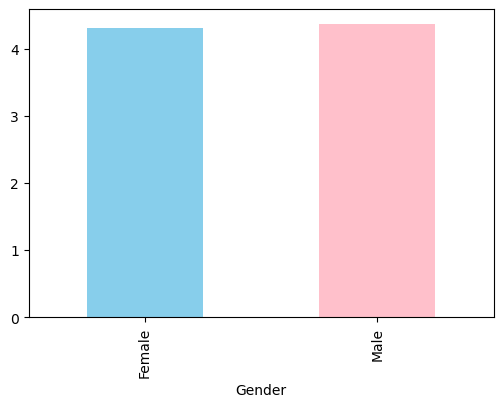

In [13]:
plt.figure(figsize=(6,4))
gender_avg.plot(kind='bar', color=['skyblue', 'pink'])

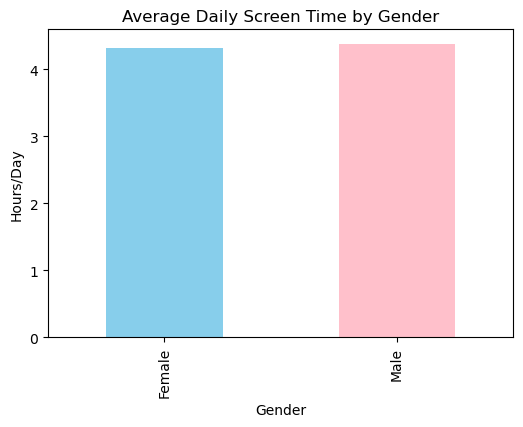

In [15]:
plt.figure(figsize=(6,4))
gender_avg.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Average Daily Screen Time by Gender")
plt.ylabel("Hours/Day")
plt.xlabel("Gender")
plt.show()

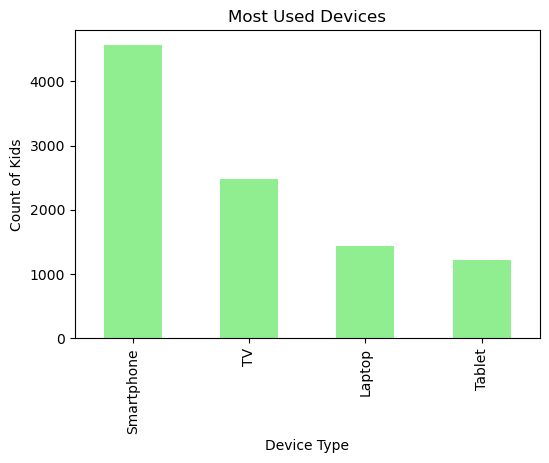

In [17]:
plt.figure(figsize=(6,4))
df["Primary_Device"].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Most Used Devices")
plt.ylabel("Count of Kids")
plt.xlabel("Device Type")
plt.show()

In [19]:
urban_rural_avg = df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean()

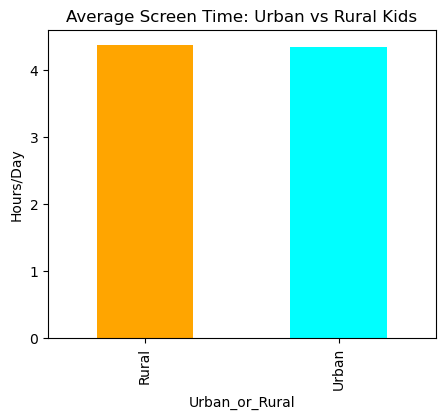

In [20]:
plt.figure(figsize=(5,4))
urban_rural_avg.plot(kind='bar', color=['orange', 'cyan'])
plt.title("Average Screen Time: Urban vs Rural Kids")
plt.ylabel("Hours/Day")
plt.show()

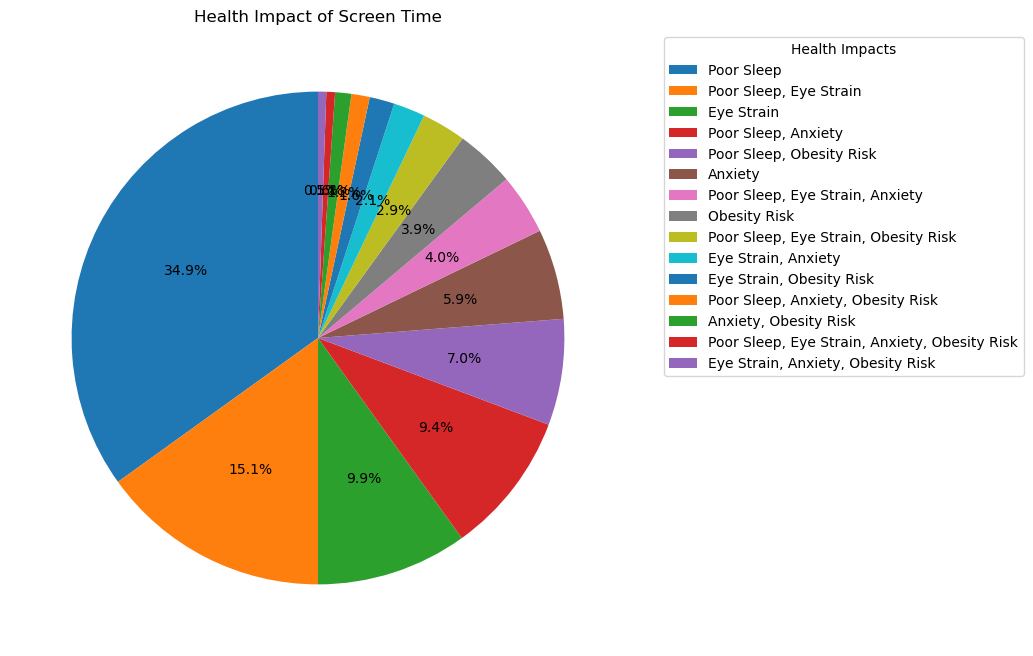

In [27]:
plt.figure(figsize=(8,8))
data = df["Health_Impacts"].value_counts()
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['']*len(data))
plt.legend(data.index, title="Health Impacts", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Health Impact of Screen Time")
plt.ylabel("")
plt.show()


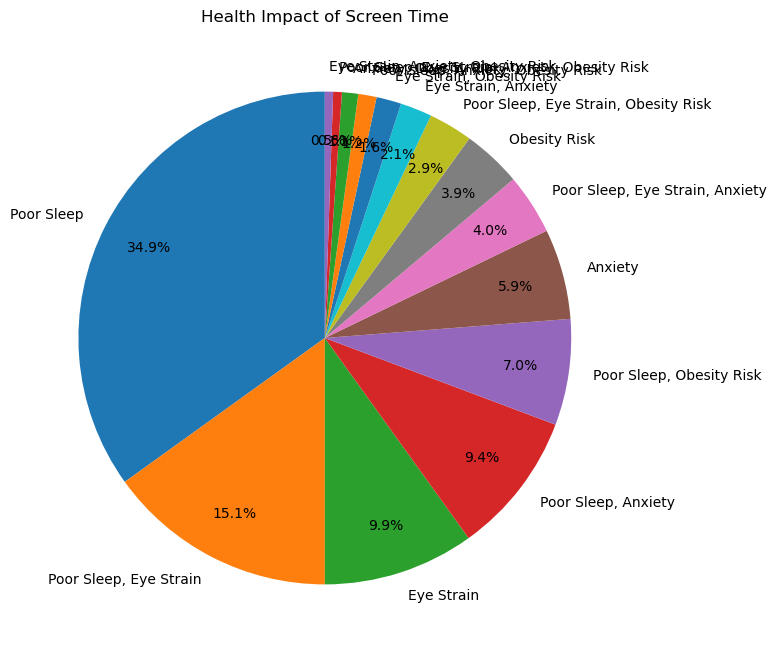

In [28]:
plt.figure(figsize=(8,8))
df["Health_Impacts"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1,   # move labels outward
    pctdistance=0.8      # move percentage inward
)
plt.title("Health Impact of Screen Time")
plt.ylabel("")
plt.show()


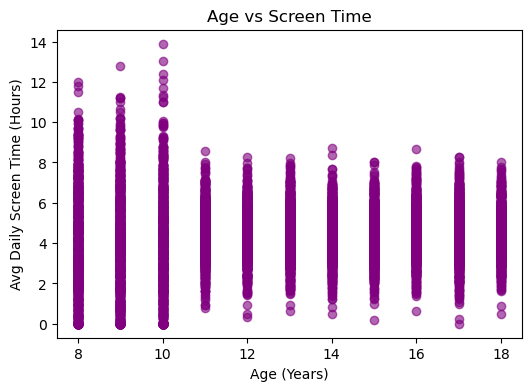

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["Avg_Daily_Screen_Time_hr"], alpha=0.6, color='purple')
plt.title("Age vs Screen Time")
plt.xlabel("Age (Years)")
plt.ylabel("Avg Daily Screen Time (Hours)")
plt.show()

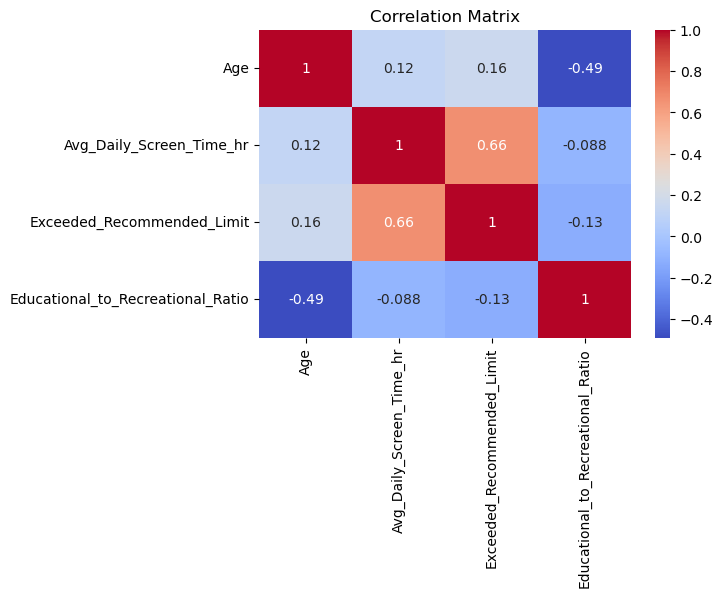

In [31]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()